  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39

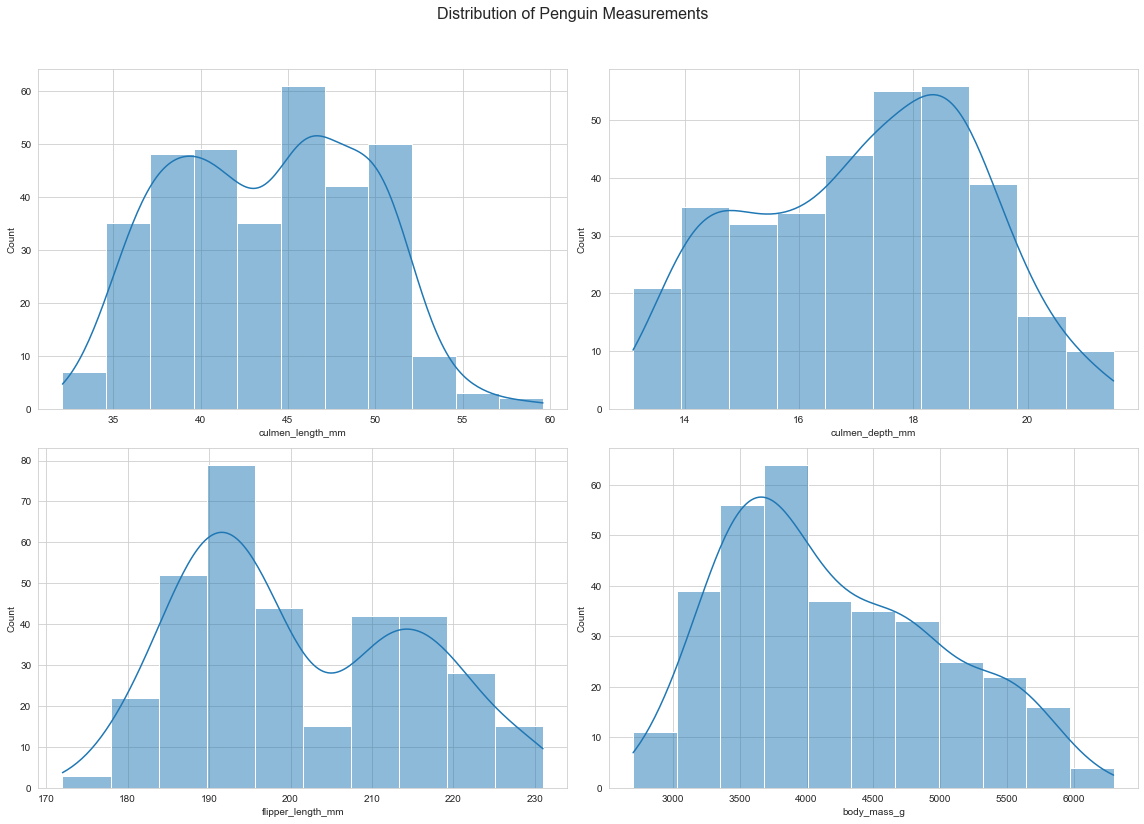

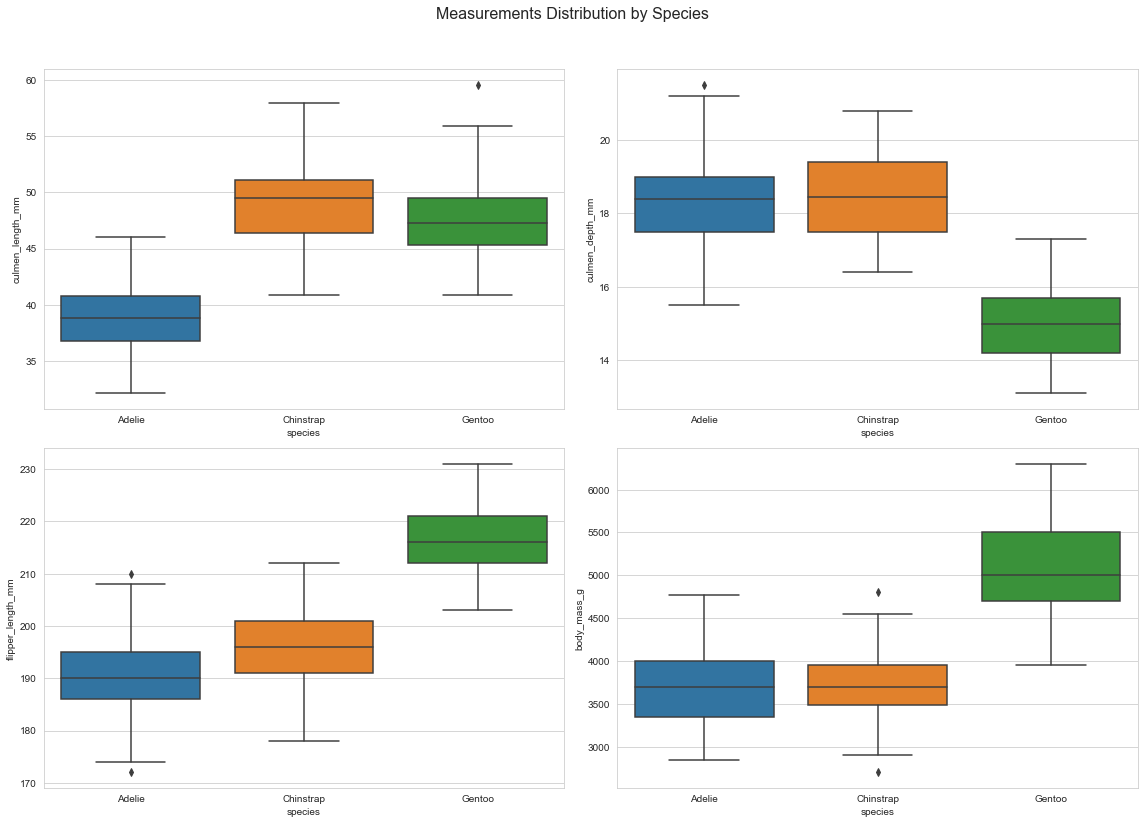

Initial Model Accuracy: 0.6268656716417911
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Score: 0.7078651685393259


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'penguins_size.csv'  # Update this path
penguins_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(penguins_data.head())

# Descriptive statistics and missing values
print(penguins_data.describe())
print(penguins_data.isnull().sum())

# Distribution of penguin measurements
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Penguin Measurements', fontsize=16)

# Histograms for each measurement
sns.histplot(data=penguins_data, x='culmen_length_mm', kde=True, ax=axes[0, 0])
sns.histplot(data=penguins_data, x='culmen_depth_mm', kde=True, ax=axes[0, 1])
sns.histplot(data=penguins_data, x='flipper_length_mm', kde=True, ax=axes[1, 0])
sns.histplot(data=penguins_data, x='body_mass_g', kde=True, ax=axes[1, 1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Measurements Distribution by Species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Measurements Distribution by Species', fontsize=16)

# Box plots for each measurement by species
sns.boxplot(data=penguins_data, x='species', y='culmen_length_mm', ax=axes[0, 0])
sns.boxplot(data=penguins_data, x='species', y='culmen_depth_mm', ax=axes[0, 1])
sns.boxplot(data=penguins_data, x='species', y='flipper_length_mm', ax=axes[1, 0])
sns.boxplot(data=penguins_data, x='species', y='body_mass_g', ax=axes[1, 1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Assuming penguins_data_cleaned is a slice from another DataFrame and you intend to modify penguins_data_cleaned
penguins_data_cleaned = penguins_data.dropna().copy()

# Explicitly modify the DataFrame using .loc
penguins_data_cleaned.loc[:, 'species_encoded'] = label_encoder.fit_transform(penguins_data_cleaned['species'])
penguins_data_cleaned.loc[:, 'sex_encoded'] = label_encoder.fit_transform(penguins_data_cleaned['sex'])

# Feature selection
X = penguins_data_cleaned[['species_encoded', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded']]
y = penguins_data_cleaned['island']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Model Accuracy: {accuracy}")

# Hyperparameter tuning (simple example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")
